# INM430 - Tiny DS Project Progress Report


***

** Student Name: ** _Laura Varsandan_

** Project Title:** _A journey into supermarket macrospace_

***




## Part-1: Data source and domain description (maximum 150 words):

The supermarket industry has numerous challenges that could be solved with Data Science. From professional experience, one of these challenges is the "macrospace" problem: how much space each section should occupy in a store in order to maximize sales or profit. This analysis will use open source data on the competition website Kaggle (https://www.kaggle.com/c/favorita-grocery-sales-forecasting). 

The key data inputs are the following:
- daily volume of sales by product and store
- daily number of transactions by store
- prices of oil
- holiday events
- store metadata
- product metadata

We will assume that this supermarket chain aims to maximize the volume of sales by allocating enough products to the high-performing sections in each store. The objective of the analysis is a forecast of how well each class in a section is likely to perform in terms of unit volume, which in turn will dictate how many products to allocate. 

***



## Part-2: Analysis Strategy and Plans (maximum 200 words):

Firstly, the datasets will be combined, whilst addressing the missing values. The data will then be aggregated at a day-store-class level, for which I will forecast the average sales per product. Next, existing features will be transformed and new features will be created. 

The data will then be split into a training and testing dataset. For example, if the month we are trying to predict is July 2017, I will include historical data up to May 2017, to mirror the timing of real-life macrospace decisions.

The analysis should consist of a prediction phase and as a stretch goal, an optimization phase:
- Prediction phase: At least one type of multiple regression algorithm will be chosen to predict the average unit sales/product for a day-store-class combination. Adjusted R-squared will be used to determine the goodness of fit. If several models are built, they will be compared based on the prediction accuracy on the test set using RMSE. 
- Optimisation phase: The predicted values will then be used in an optimization algorithm that will suggest how many products should be ranged in each store-class combination for our target month to maximize volume sales. These will be then aggregated at store-section level.



***
***

## Part-3: Initial investigations on the data sources (maximum 150 words): 

The datasets have the following dimensions:

| Datasets        | Rows          | Columns  |
| --------------- |:-------------:| --------:|
| holidays_events | 350           |     6    |
| items           | 4,100         |     4    |
| oil             | 1,218         |     2    |
| stores          | 54            |     5    |
| train           | 125,497,040   |     6    |
| transactions    | 83,488        |     3    |

For the'onpromotion' column of the 'train' dataset, 17% of the data was missing. The data was missing for the whole period between Janaury 2013 to March 2014. 

From domain knowledge, the 'onpromotion' field is likely to be very important in predicting sales. Since the product choice in the past 2-3 years has almost doubled compared to 2013 and imputing values for that historical period is likely to be very tricky,I decided to exclude the period between January 2013 and March 2014 from our analysis.

I also joined the 'items' dataset to the 'train' dataset and aggregated the data at a day-store-class level, which is the intermediary level between product and section ('family' in our case). This is the relevant level for our analysis and has also the benefit of reducing the number of rows from 125m to 12m, easing the computational complexity. 


***
***
## Part-4: Python code for initial investigations

### Reading in the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dtypes={'date':np.str,'type':np.str,'locale':np.str,'locale_name':np.str,'description':np.str,'transferred':np.bool}
parse_dates=['date']
holidays_events = pd.read_csv('holidays_events.csv', dtype=dtypes, parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",holidays_events.shape)
pd.DataFrame.head(holidays_events)

Rows and columns: (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
dtypes={'item_nbr': np.int64,'family':np.str,'class':np.int64,'perishable':np.int64}
items = pd.read_csv('items.csv',dtype=dtypes) # opens the csv file
print("Rows and columns:",items.shape)
pd.DataFrame.head(items)

Rows and columns: (4100, 4)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [4]:
dtypes={'date':np.str,'dcoilqtico': np.float64}
parse_dates=['date']
oil = pd.read_csv('oil.csv', dtype=dtypes, parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",oil.shape)
pd.DataFrame.head(oil)

Rows and columns: (1218, 2)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
dtypes={'store_nbr':np.int64,'city':np.str,'state':np.str,'type':np.str,'cluster':np.int64}
stores = pd.read_csv('stores.csv',dtype=dtypes) # opens the csv file
print("Rows and columns:",stores.shape)
pd.DataFrame.head(stores)

Rows and columns: (54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
dtypes={'id': np.int64,'date':np.str,'store_nbr':np.int64,'item_nbr':np.int64,'unit_sales': np.float64,'onpromotion':np.float64}
parse_dates=['date']
train = pd.read_csv('train.csv', dtype=dtypes,parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",train.shape)
pd.DataFrame.head(train)

Rows and columns: (125497040, 6)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [6]:
dtypes={'date':np.str,'store_nbr':np.int64,'transactions':np.int64}
parse_dates=['date']
transactions = pd.read_csv('transactions.csv', dtype=dtypes,parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",transactions.shape)
pd.DataFrame.head(transactions)

Rows and columns: (83488, 3)


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Merge the train dataset with items

Since the 'train' dataset has 125m rows, this will cause computational complexity problems down the line. For the purposes of this analysis, product level data is not necessary, so in order to reduce the number of rows, I will aggregate the data one level up: at class level.

For the colums that are flags (perishable and onpromotion), I will convert those to display the number of products where the flags were 'True'.

In [8]:
merged=pd.merge(train,items,on='item_nbr', how='left')
print("Rows and columns:",merged.shape)
pd.DataFrame.head(merged)

Rows and columns: (125497040, 9)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,0,2013-01-01,25,103665,7.0,NaN,BREAD/BAKERY,2712,1
1,1,2013-01-01,25,105574,1.0,NaN,GROCERY I,1045,0
2,2,2013-01-01,25,105575,2.0,NaN,GROCERY I,1045,0
3,3,2013-01-01,25,108079,1.0,NaN,GROCERY I,1030,0
4,4,2013-01-01,25,108701,1.0,NaN,DELI,2644,1


In [9]:
# Inspect the columns with NaN before Aggregating
merged.isnull().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21626880
family                0
class                 0
perishable            0
dtype: int64

It is therefore safe to aggregate all data points to a class level apart from the 'on promotion' column which has a high number of missing values.

In [9]:
group=merged.groupby(['date','store_nbr','class','family'],as_index=False)
class_sales=pd.DataFrame(group['unit_sales'].agg('sum'))
pd.DataFrame.head(class_sales)

,date,store_nbr,class,family,unit_sales
0,2013-01-01,25,1002,GROCERY I,7.0
1,2013-01-01,25,1003,GROCERY I,1.0
2,2013-01-01,25,1004,GROCERY I,32.0
3,2013-01-01,25,1006,GROCERY I,3.0
4,2013-01-01,25,1008,GROCERY I,4.0


In [10]:
class_items=pd.DataFrame(group['item_nbr'].agg('count'))
pd.DataFrame.head(class_items)

,date,store_nbr,class,family,item_nbr
0,2013-01-01,25,1002,GROCERY I,5
1,2013-01-01,25,1003,GROCERY I,1
2,2013-01-01,25,1004,GROCERY I,14
3,2013-01-01,25,1006,GROCERY I,3
4,2013-01-01,25,1008,GROCERY I,1


In [11]:
class_perishables=pd.DataFrame(group['perishable'].agg('sum'))
pd.DataFrame.head(class_perishables)

,date,store_nbr,class,family,perishable
0,2013-01-01,25,1002,GROCERY I,0
1,2013-01-01,25,1003,GROCERY I,0
2,2013-01-01,25,1004,GROCERY I,0
3,2013-01-01,25,1006,GROCERY I,0
4,2013-01-01,25,1008,GROCERY I,0


Merging the unit sales, number of items and perishable metrics in one file

In [12]:
class_merged=pd.merge(class_sales,class_items,on=['date','store_nbr','class','family'],how='left')
class_merged=pd.merge(class_merged,class_perishables,on=['date','store_nbr','class','family'],how='left')
class_merged.columns=['date','store_nbr','class','family','sum_unit_sales','no_items','no_perishable_items']
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (15852838, 7)


,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items
0,2013-01-01,25,1002,GROCERY I,7.0,5,0
1,2013-01-01,25,1003,GROCERY I,1.0,1,0
2,2013-01-01,25,1004,GROCERY I,32.0,14,0
3,2013-01-01,25,1006,GROCERY I,3.0,3,0
4,2013-01-01,25,1008,GROCERY I,4.0,1,0


### Dealing with missing Values for 'onpromotion' field

In [16]:
# Let's look at the types of values for 'onpromotion'
merged['onpromotion'].value_counts(normalize=True,dropna=False)

 0.0    0.765188
NaN     0.172330
 1.0    0.062483
Name: onpromotion, dtype: float64

We can see that 17% of the values as missing, 76% of values are 0 and only 6% of values are 1. 

The next question we need to ask ourselves is if these values are missing randomly across the dataset, or ar they always missing for example for a certain store or product. Let's find out.

In [14]:
# Looking to see what % of stores have missing values for 'onpromotion'
nulls=pd.DataFrame(merged[pd.isnull(merged.onpromotion)])
stores_with_nulls=len(nulls['store_nbr'].unique())
all_stores=len(stores['store_nbr'].unique())
stores_with_nulls/all_stores

0.8703703703703703

The missing values seem to be relatively well spread across the majority of stores. That means we can't say that a few stores are causing the missing values.

Let's also look at products. 

In [15]:
products_with_nulls=len(nulls['item_nbr'].unique())
all_products=len(items['item_nbr'].unique())
products_with_nulls/all_products

0.6509756097560976

The missing values also seem to be relatively well spread across the majority of products.That means we can't say that a few stores are causing the missing values.

Let's also look at the time period.

In [17]:
dates_with_nulls=len(nulls['date'].unique())
all_dates=len(merged['date'].unique())
dates_with_nulls/all_dates

0.2695961995249406

Only 27% of dates have null values for 'onpromotion'. We need to therefore investigate 1) which dates are the most problematic and 2) for each date, how many products have missing information

In [18]:
#counting the frequency of nulls for each date
date_null_agg=pd.DataFrame(nulls['date'].value_counts())
date_null_agg.columns=['frequency']
date_null_agg['date']=date_null_agg.index
pd.DataFrame.head(date_null_agg)

,frequency,date
2014-03-01,70051,2014-03-01
2014-01-04,69052,2014-01-04
2014-03-29,68879,2014-03-29
2014-01-18,68864,2014-01-18
2014-01-11,68393,2014-01-11


In [19]:
#counting the frequency of train data for each date
date_agg=pd.DataFrame(merged['date'].value_counts())
date_agg.columns=['frequency']
date_agg['date']=date_agg.index
pd.DataFrame.head(date_agg)

,frequency,date
2017-07-01,118194,2017-07-01
2017-04-01,118122,2017-04-01
2017-07-02,117286,2017-07-02
2017-05-01,117116,2017-05-01
2017-06-04,117074,2017-06-04


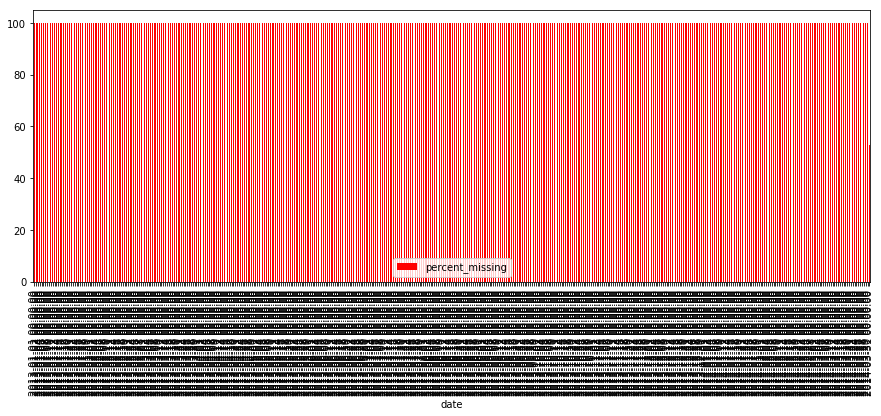

In [27]:
#calculating the share of missing values for each date
date_null_agg_merged=pd.merge(date_null_agg,date_agg, on='date',how='left')
date_null_agg_merged['percent_missing']=date_null_agg_merged['frequency_x']/date_null_agg_merged['frequency_y']*100
date_null_agg_merged=date_null_agg_merged.sort_values(by='date')
pd.DataFrame.head(date_null_agg_merged)
date_null_agg_merged.plot('date','percent_missing',kind='bar', color='r', figsize=(15,5))

It looks like on certain days all the values for 'on-promotion' are missing. We need to understand exactly which time periods are affected by this so that we can make a decision on how to treat missing variables. 

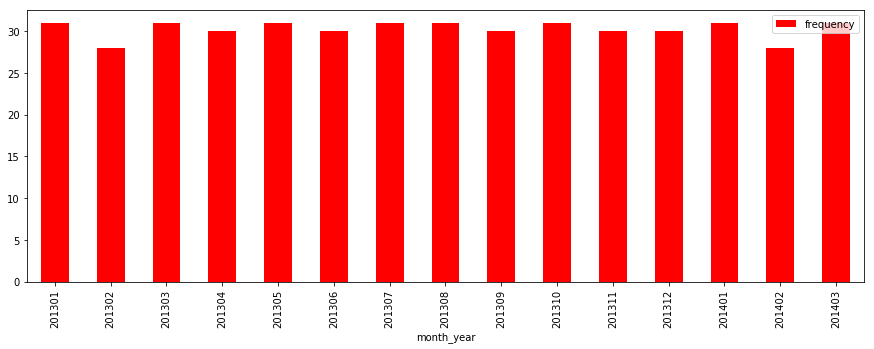

In [30]:
date_null_agg_merged['month_year']=100*date_null_agg_merged['date'].dt.year+date_null_agg_merged['date'].dt.month
month_null_agg_merged=pd.DataFrame(date_null_agg_merged['month_year'].value_counts())
month_null_agg_merged.columns=['frequency']
month_null_agg_merged['month_year']=month_null_agg_merged.index
month_null_agg_merged=month_null_agg_merged.sort_values(by='month_year')
pd.DataFrame.head(month_null_agg_merged)
month_null_agg_merged.plot('month_year','frequency',kind='bar', color='r', figsize=(15,5))

We can see that the 'onpromotion' missing values was incurred for all dates until March 2014. This is probably due to the fact that the company did not capture this kind of data before hand. 

From domain knowledge, the 'onpromotion' field is likely to be very important in predicting sales. Therefore, we can either decide to try an impute the missing values for that period, or exclude that period from analysis. 

In order to decide, let's take a look at how many products were ranged in that period compared to the latest months of the analysis. This will give us an indication of how relevant the old data is for predicting more recent data. 

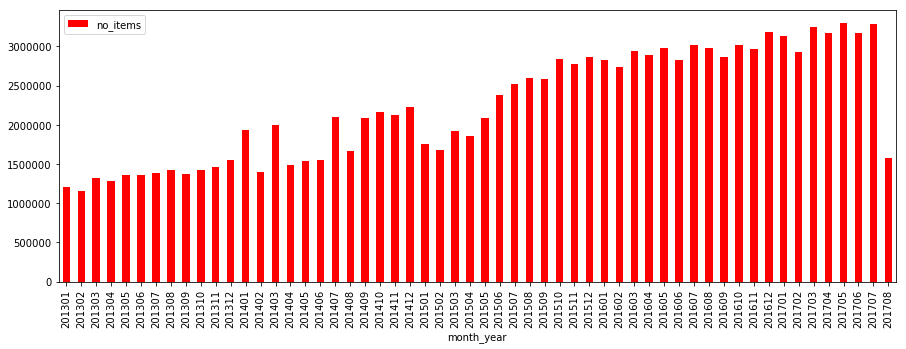

In [35]:
class_merged['month_year']=100*class_merged['date'].dt.year+class_merged['date'].dt.month
monthyear_group=class_merged.groupby(['month_year'],as_index=False)
month_year_products=pd.DataFrame(monthyear_group['no_items'].agg('sum'))
month_year_products=month_year_products.sort_values(by='month_year')
month_year_products.plot('month_year','no_items',kind='bar', color='r', figsize=(15,5))

We can see from this graph that the product choice in the past 2-3 years has almost doubled compared to 2013, which means that the period with missing values for 'onpromotion' could be excluded as it might not be as relevant. Moreover, if we did try to inpute the data, the 'onpromotion' flag has unbalanced values (only 6% of data points are on promotion) which would make the predictions very difficult and inacurate predictions for the 'onpromotion' field might make our model less accurate. Therefore we will exclude the period between January 2013 and March 2014 from our analysis. 

In [13]:
merged = merged[merged.date>'2014-03-31']

In [39]:
min_date=min(merged['date'])
max_date=max(merged['date'])
print ("Min Date:",min_date)
print ("Max Date:",max_date)

Min Date: 2014-04-01 00:00:00
Max Date: 2017-08-15 00:00:00


In [14]:
class_merged=class_merged[class_merged.date>'2014-03-31']

Adding the onpromotion count to the class_merged dataset

In [15]:
group=merged.groupby(['date','store_nbr','class','family'],as_index=False)
class_onpromotion=pd.DataFrame(group['onpromotion'].agg('sum'))
pd.DataFrame.head(class_onpromotion)

,date,store_nbr,class,family,onpromotion
0,2014-04-01,1,1002,GROCERY I,0.0
1,2014-04-01,1,1003,GROCERY I,0.0
2,2014-04-01,1,1004,GROCERY I,0.0
3,2014-04-01,1,1006,GROCERY I,0.0
4,2014-04-01,1,1008,GROCERY I,0.0


Adding the onpromotion metric to the class_merged dataset

In [16]:
class_merged=pd.merge(class_merged,class_onpromotion,on=['date','store_nbr','class','family'],how='left')
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (12747341, 8)


,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,onpromotion
0,2014-04-01,1,1002,GROCERY I,14.0,7,0,0.0
1,2014-04-01,1,1003,GROCERY I,2.0,1,0,0.0
2,2014-04-01,1,1004,GROCERY I,88.0,17,0,0.0
3,2014-04-01,1,1006,GROCERY I,4.0,2,0,0.0
4,2014-04-01,1,1008,GROCERY I,3.0,1,0,0.0


In [17]:
class_merged.columns=['date','store_nbr','class','family','sum_unit_sales','no_items','no_perishable_items','items_onpromotion']
pd.DataFrame.head(class_merged)

,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion
0,2014-04-01,1,1002,GROCERY I,14.0,7,0,0.0
1,2014-04-01,1,1003,GROCERY I,2.0,1,0,0.0
2,2014-04-01,1,1004,GROCERY I,88.0,17,0,0.0
3,2014-04-01,1,1006,GROCERY I,4.0,2,0,0.0
4,2014-04-01,1,1008,GROCERY I,3.0,1,0,0.0


In [18]:
class_merged.to_csv('class_merged.csv',sep=',')

Reading in the class_merged dataset

In [7]:
dtypes={'date':np.str,'store_nbr':np.int64,'class':np.str,'family':np.str,'sum_unit_sales': np.float64,'no_items':np.float64,'no_perishable_items':np.float64,'items_onpromotion':np.float64}
parse_dates=['date']
class_merged = pd.read_csv('class_merged.csv', dtype=dtypes,parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (12747341, 9)


,Unnamed: 0,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion
0,0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0
1,1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0
2,2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0
3,3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0
4,4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0


### Exploring the Oil Data

Checking for missing values by adding the oil data to the main train dataset - 'class_merged'

In [9]:
group=class_merged.groupby(['date'],as_index=False)
daily_sales=pd.DataFrame(group['sum_unit_sales'].agg('sum'))
pd.DataFrame.head(daily_sales)

,date,sum_unit_sales
0,2014-04-01,485078.8870
1,2014-04-02,463917.3160
2,2014-04-03,388867.9614
3,2014-04-04,422578.7449
4,2014-04-05,617680.1940


In [10]:
daily_sales=pd.merge(daily_sales,oil,on=['date'],how='left')
print("Rows and columns:",daily_sales.shape)
pd.DataFrame.head(daily_sales)

Rows and columns: (1230, 3)


,date,sum_unit_sales,dcoilwtico
0,2014-04-01,485078.8870,99.69
1,2014-04-02,463917.3160,99.60
2,2014-04-03,388867.9614,100.29
3,2014-04-04,422578.7449,101.16
4,2014-04-05,617680.1940,NaN


In [12]:
# counting the number of missing values
oil_nulls=pd.DataFrame(daily_sales[pd.isnull(daily_sales.dcoilwtico)])
dates_with_nulls=len(oil_nulls['date'].unique())
all_dates=len(daily_sales['date'].unique())
dates_with_nulls/all_dates

0.3089430894308943

That is a significant percentage of dates that have missing data for oil. 
After doing some research to try and get better oil price data, I have stumpbled over the same official source that Kaggle has probably used as well for the oil price data: the daily oil price of the West Texas Intermediate (WTI) - Cushing, Oklahoma(https://fred.stlouisfed.org/series/DCOILWTICO), which is deemed to represent the oil price, it's difficult to find a better quality of oil price data. Alternative sources of the same data have the same gaps (https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RWTC&f=D).
Therefore, this dataset will be used and we will have to impute the missing values.

First let's check if the missing data is indeed missing at random. 

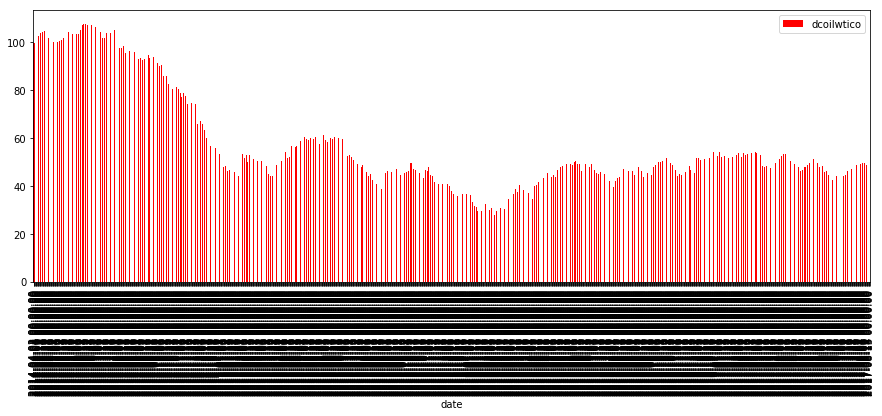

In [14]:
daily_sales.plot('date','dcoilwtico',kind='bar', color='r', figsize=(15,5))

The data does seem to be missing at random. 

Imputation process: since there are no major gaps in the missing data and since the daily price fluctuations are unlikely to have massive fluctuations from one day to the other, we will use interpolation as the main imputation process for the oil price data. 

In [18]:
oil_interpolation=daily_sales[['date','dcoilwtico']]
pd.DataFrame.head(oil_interpolation)

,date,dcoilwtico
0,2014-04-01,99.69
1,2014-04-02,99.60
2,2014-04-03,100.29
3,2014-04-04,101.16
4,2014-04-05,NaN


In [21]:
oil_interpolation.index.names=[None]
oil_interpolation.set_index('date',inplace=True)
pd.DataFrame.head(oil_interpolation)

,dcoilwtico
date,
2014-04-01,99.69
2014-04-02,99.60
2014-04-03,100.29
2014-04-04,101.16
2014-04-05,NaN


In [22]:
oil_interpolation.columns=['dcoilwtico']

pd.DataFrame.head(oil_interpolation)

,dcoilwtico
date,
2014-04-01,99.69
2014-04-02,99.60
2014-04-03,100.29
2014-04-04,101.16
2014-04-05,NaN


In [26]:
oil_interpolation=oil_interpolation.interpolate()
pd.DataFrame.head(oil_interpolation)

,dcoilwtico
date,
2014-04-01,99.690000
2014-04-02,99.600000
2014-04-03,100.290000
2014-04-04,101.160000
2014-04-05,100.916667


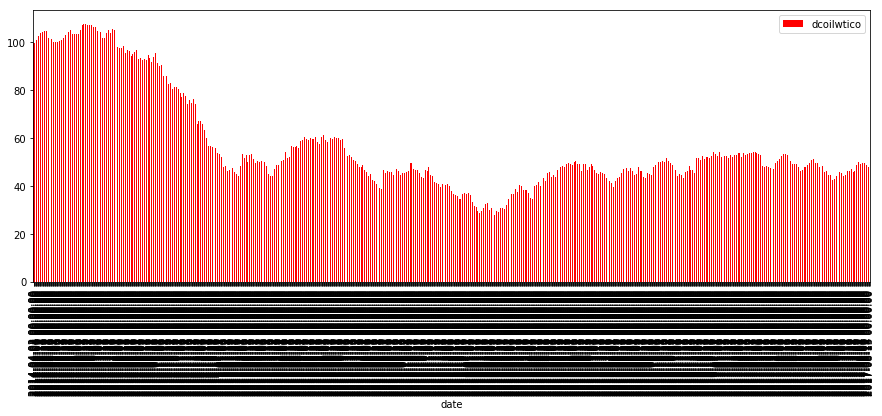

In [28]:
#check results
oil_interpolation['date']=oil_interpolation.index
pd.DataFrame.head(oil_interpolation)
oil_interpolation.plot('date','dcoilwtico',kind='bar', color='r', figsize=(15,5))

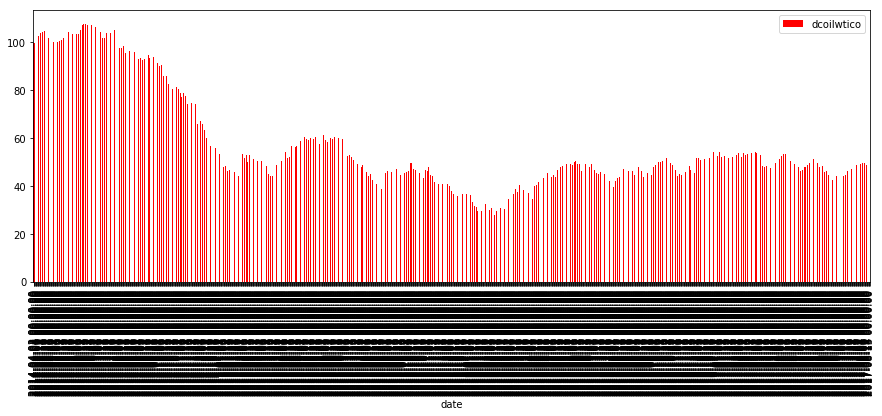

In [29]:
#compare to old version
daily_sales.plot('date','dcoilwtico',kind='bar', color='r', figsize=(15,5))

In [30]:
#check for NaN to make sure
oil_nulls_after_interpolation=pd.DataFrame(oil_interpolation[pd.isnull(oil_interpolation.dcoilwtico)])
pd.DataFrame.head(oil_nulls_after_interpolation)

,dcoilwtico,date
date,,


Now that the oil price data has been imputed, we can add it to the main data frame

In [31]:
class_merged=pd.merge(class_merged,oil_interpolation,on=['date'],how='left')
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (12747341, 10)


,Unnamed: 0,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico
0,0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69
1,1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69
2,2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69
3,3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69
4,4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69


### Exploring the Shops Dim Data

 Exploring the Shops Dim Data by adding it to the main dataframe to check if there are any nulls

In [32]:
class_merged=pd.merge(class_merged,stores,on=['store_nbr'],how='left')
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (12747341, 14)


,Unnamed: 0,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,state,type,cluster
0,0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,Pichincha,D,13
1,1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13
2,2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,Pichincha,D,13
3,3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,Pichincha,D,13
4,4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13


In [33]:
#Checking for nulls
class_merged.isnull().sum()

Unnamed: 0             0
date                   0
store_nbr              0
class                  0
family                 0
sum_unit_sales         0
no_items               0
no_perishable_items    0
items_onpromotion      0
dcoilwtico             0
city                   0
state                  0
type                   0
cluster                0
dtype: int64

### Exploring the transactions data 

Exploring the transactions data by adding it to the main dataframe and check if there are any nulls.

In [34]:
class_merged=pd.merge(class_merged,transactions,on=['date','store_nbr'],how='left')
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (12747341, 15)


,Unnamed: 0,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,state,type,cluster,transactions
0,0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
1,1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
2,2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
3,3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
4,4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0


In [35]:
#Checking for nulls
class_merged.isnull().sum()

Unnamed: 0                 0
date                       0
store_nbr                  0
class                      0
family                     0
sum_unit_sales             0
no_items                   0
no_perishable_items        0
items_onpromotion          0
dcoilwtico                 0
city                       0
state                      0
type                       0
cluster                    0
transactions           24661
dtype: int64

It looks like the transactions data has some missing values. Let's explore if these are at random.

In [36]:
stores_tran_nulls=pd.DataFrame(class_merged[pd.isnull(class_merged.transactions)])
stores_with_nulls=len(stores_tran_nulls['store_nbr'].unique())
all_stores=len(stores['store_nbr'].unique())
stores_with_nulls/all_stores

0.9814814814814815

Almost all stores seem to have missing data at some point. Let's look at the distribution of missing data over time.

In [37]:
dates_with_nulls=len(stores_tran_nulls['date'].unique())
all_dates=len(class_merged['date'].unique())
dates_with_nulls/all_dates

0.0040650406504065045

It looks that only very few dates have the missing values. Let's see which


In [39]:
stores_tran_nulls['date'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-09-27T00:00:00.000000000'], dtype='datetime64[ns]')

Only 5 dates in 2016 have missing values in terms of the transactions. Let's wait until the feature building stage to see if we need to impute those or if we can create a feature that will not be affected by the missing values. 

In [40]:
# save the results so far
class_merged.to_csv('class_merged_excl_hol.csv',sep=',')

### Explore adding the holidays data to the main dataset


In [6]:
## reading in the dataset again
dtypes={'date':np.str,'store_nbr':np.int64,'class':np.str,'family':np.str,'sum_unit_sales': np.float64,'no_items':np.float64,'no_perishable_items':np.float64,'items_onpromotion':np.float64,'dcoilwtico':np.float64,'city':np.str,'state':np.str,'type':np.str,'cluster':np.str,'transactions':np.float64}
parse_dates=['date']
class_merged = pd.read_csv('class_merged_excl_hol.csv', names=['date','store_nbr','class','family','sum_unit_sales','no_items','no_perishable_items','items_onpromotion','dcoilwtico','city','state','type','cluster','transactions'],skiprows=1) # opens the csv file
#class_merged = pd.read_csv('class_merged.csv'), dtype=dtypes,parse_dates=parse_dates)
print("Rows and columns:",class_merged.shape)
pd.DataFrame.head(class_merged)

Rows and columns: (12747341, 14)


,,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,state,type,cluster,transactions
0,0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
1,1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
2,2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
3,3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0
4,4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0


In [8]:
#check the datatypes
class_merged.dtypes

date                    object
store_nbr                int64
class                    int64
family                  object
sum_unit_sales         float64
no_items               float64
no_perishable_items    float64
items_onpromotion      float64
dcoilwtico             float64
city                    object
state                   object
type                    object
cluster                  int64
transactions           float64
dtype: object

In [10]:
#change the data types
class_merged.date=class_merged.date.astype(str)
class_merged.family=class_merged.family.astype(str)
class_merged.city=class_merged.city.astype(str)
class_merged.state=class_merged.state.astype(str)
class_merged.type=class_merged.type.astype(str)
class_merged.dtypes

date                    object
store_nbr                int64
class                    int64
family                  object
sum_unit_sales         float64
no_items               float64
no_perishable_items    float64
items_onpromotion      float64
dcoilwtico             float64
city                    object
state                   object
type                    object
cluster                  int64
transactions           float64
dtype: object

In [14]:
class_merged.date=pd.to_datetime(class_merged.date)
class_merged.dtypes

date                   datetime64[ns]
store_nbr                       int64
class                           int64
family                         object
sum_unit_sales                float64
no_items                      float64
no_perishable_items           float64
items_onpromotion             float64
dcoilwtico                    float64
city                           object
state                          object
type                           object
cluster                         int64
transactions                  float64
dtype: object

In [11]:
dtypes={'date':np.str,'type':np.str,'locale':np.str,'locale_name':np.str,'description':np.str,'transferred':np.bool}
parse_dates=['date']
holidays_events = pd.read_csv('holidays_events.csv', dtype=dtypes, parse_dates=parse_dates) # opens the csv file
print("Rows and columns:",holidays_events.shape)
pd.DataFrame.head(holidays_events)

Rows and columns: (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [13]:
holidays_events.dtypes

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

This is a description on Kaggle about the holidays dataset: "NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday)."

In [15]:
# remove the holidays where the days have been transfered to only leave the days where they were actually celebrated.
transfered_holidays=holidays_events[(holidays_events.type=='Holiday') & (holidays_events.transferred==True)]
print("Rows and columns:",transfered_holidays.shape)
pd.DataFrame.head(transfered_holidays)

Rows and columns: (12, 6)


,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True


In [16]:
transfer_holidays=holidays_events[(holidays_events.type=='Transfer') & (holidays_events.transferred==False)]
print("Rows and columns:",transfer_holidays.shape)
pd.DataFrame.head(transfer_holidays)

Rows and columns: (12, 6)


,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False


Since we have all the transfered holidays, we can remove the actual holiday dates

In [17]:
actual_holidays=holidays_events[(holidays_events.transferred==False)]
print("Rows and columns:",actual_holidays.shape)
pd.DataFrame.head(actual_holidays)

Rows and columns: (338, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


Holidays have to be linked depending on whether they are national, regional or local.
Let's first add the national holidays.

In [18]:
national_holidays=actual_holidays[actual_holidays.locale=='National']
print("Rows and columns:",national_holidays.shape)
pd.DataFrame.head(national_holidays)

Rows and columns: (166, 6)


,date,type,locale,locale_name,description,transferred
14,2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
21,2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
22,2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False
31,2012-12-21,Additional,National,Ecuador,Navidad-4,False


Adding these to the main dataset

In [19]:
national_hol=national_holidays[['date','description','locale']]
print("Rows and columns:",national_hol.shape)
pd.DataFrame.head(national_hol)

Rows and columns: (166, 3)


,date,description,locale
14,2012-08-10,Primer Grito de Independencia,National
20,2012-10-12,Traslado Independencia de Guayaquil,National
21,2012-11-02,Dia de Difuntos,National
22,2012-11-03,Independencia de Cuenca,National
31,2012-12-21,Navidad-4,National


In [23]:
class_merged_hol=pd.merge(class_merged,national_hol,on=['date'],how='left')
print("Rows and columns:",class_merged_hol.shape)
pd.DataFrame.head(class_merged_hol)

Rows and columns: (12792954, 16)


,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,state,type,cluster,transactions,description,locale
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN


In [24]:
#Check that they have joined properly
unique_desc=class_merged_hol['description'].unique()
print (unique_desc)

[nan 'Viernes Santo' 'Dia del Trabajo' 'Dia de la Madre-1'
 'Dia de la Madre' 'Batalla de Pichincha'
 'Inauguracion Mundial de futbol Brasil'
 'Mundial de futbol Brasil: Ecuador-Suiza'
 'Mundial de futbol Brasil: Ecuador-Honduras'
 'Mundial de futbol Brasil: Ecuador-Francia'
 'Mundial de futbol Brasil: Octavos de Final'
 'Mundial de futbol Brasil: Cuartos de Final'
 'Mundial de futbol Brasil: Semifinales'
 'Mundial de futbol Brasil: Tercer y cuarto lugar'
 'Mundial de futbol Brasil: Final' 'Primer Grito de Independencia'
 'Traslado Independencia de Guayaquil' 'Dia de Difuntos'
 'Independencia de Cuenca' 'Black Friday' 'Cyber Monday'
 'Recupero Puente Navidad' 'Navidad-4' 'Navidad-3' 'Navidad-2' 'Navidad-1'
 'Puente Navidad' 'Navidad+1' 'Primer dia del ano-1' 'Primer dia del ano'
 'Puente Primer dia del ano' 'Recupero Puente Primer dia del ano'
 'Carnaval' 'Independencia de Guayaquil' 'Terremoto Manabi'
 'Terremoto Manabi+1' 'Terremoto Manabi+2' 'Terremoto Manabi+3'
 'Terremoto Manabi+4

Now we need to add regional holidays

In [25]:
regional_holidays=actual_holidays[actual_holidays.locale=='Regional']
print("Rows and columns:",regional_holidays.shape)
pd.DataFrame.head(regional_holidays)

Rows and columns: (24, 6)


,date,type,locale,locale_name,description,transferred
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
23,2012-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
24,2012-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False
47,2013-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


We don't know whether the locale_name matches either the City or the State, so we need to find out in order to be able to link them properly. 


In [38]:
locale_name_regional_hols=regional_holidays['locale_name'].unique()
print(locale_name_regional_hols)

['Cotopaxi' 'Imbabura' 'Santo Domingo de los Tsachilas' 'Santa Elena']


In [39]:
class_merged_city=class_merged_hol['city'].unique()
print(class_merged_city)

['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo' 'Quevedo'
 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas' 'El Carmen'
 'Manta' 'Puyo']


In [40]:
class_merged_state=class_merged_hol['state'].unique()
print(class_merged_state)

['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Tungurahua' 'Guayas' 'Santa Elena' 'Los Rios'
 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi' 'Pastaza']


So the locale_name for regional holidays corresponds to the state field in our main dataset. Let's do the join on that. 

In [26]:
regional_hol=regional_holidays[['date','description','locale','locale_name']]
regional_hol.columns=['date','description_regional_hol','locale_regional','state']
pd.DataFrame.head(regional_hol)

,date,description_regional_hol,locale_regional,state
1,2012-04-01,Provincializacion de Cotopaxi,Regional,Cotopaxi
7,2012-06-25,Provincializacion de Imbabura,Regional,Imbabura
23,2012-11-06,Provincializacion de Santo Domingo,Regional,Santo Domingo de los Tsachilas
24,2012-11-07,Provincializacion Santa Elena,Regional,Santa Elena
47,2013-04-01,Provincializacion de Cotopaxi,Regional,Cotopaxi


In [27]:
class_merged_hol=pd.merge(class_merged_hol,regional_hol,on=['date','state'],how='left')
print("Rows and columns:",class_merged_hol.shape)
pd.DataFrame.head(class_merged_hol)

Rows and columns: (12792954, 18)


,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,state,type,cluster,transactions,description,locale,description_regional_hol,locale_regional
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN


In [28]:
#check they have joined properly
unique_desc_reg=class_merged_hol['description_regional_hol'].unique()
print (unique_desc_reg)

[nan 'Provincializacion de Cotopaxi' 'Provincializacion de Imbabura'
 'Provincializacion de Santo Domingo' 'Provincializacion Santa Elena']


Now let's add the local holidays

In [29]:
local_holidays=actual_holidays[actual_holidays.locale=='Local']
print("Rows and columns:",local_holidays.shape)
pd.DataFrame.head(local_holidays)

Rows and columns: (148, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False


In [46]:
locale_name_local_hols=local_holidays['locale_name'].unique()
print(locale_name_local_hols)

['Manta' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda' 'Latacunga'
 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe' 'Esmeraldas' 'Ambato'
 'Ibarra' 'Quevedo' 'Quito' 'Loja' 'Salinas' 'Guayaquil']


It looks like these are city names. Let's join them on City name. 

In [30]:
local_hol=local_holidays[['date','description','locale','locale_name']]
local_hol.columns=['date','description_local_hol','locale_local','city']
pd.DataFrame.head(local_hol)

,date,description_local_hol,locale_local,city
0,2012-03-02,Fundacion de Manta,Local,Manta
2,2012-04-12,Fundacion de Cuenca,Local,Cuenca
3,2012-04-14,Cantonizacion de Libertad,Local,Libertad
4,2012-04-21,Cantonizacion de Riobamba,Local,Riobamba
5,2012-05-12,Cantonizacion del Puyo,Local,Puyo


In [31]:
class_merged_hol=pd.merge(class_merged_hol,local_hol,on=['date','city'],how='left')
print("Rows and columns:",class_merged_hol.shape)
pd.DataFrame.head(class_merged_hol)

Rows and columns: (12794614, 20)


,date,store_nbr,class,family,sum_unit_sales,no_items,no_perishable_items,items_onpromotion,dcoilwtico,city,state,type,cluster,transactions,description,locale,description_regional_hol,locale_regional,description_local_hol,locale_local
0,2014-04-01,1,1002,GROCERY I,14.0,7.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-04-01,1,1003,GROCERY I,2.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-04-01,1,1004,GROCERY I,88.0,17.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-04-01,1,1006,GROCERY I,4.0,2.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-04-01,1,1008,GROCERY I,3.0,1.0,0.0,0.0,99.69,Quito,Pichincha,D,13,1847.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#check they have joined properly
unique_desc_loc=class_merged_hol['description_local_hol'].unique()
print (unique_desc_loc)

[nan 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion de Guaranda'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Guayaquil-1'
 'Fundacion de Guayaquil' 'Fundacion de Esmeraldas' 'Fundacion de Ambato'
 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guaranda' 'Independencia de Latacunga'
 'Independencia de Ambato' 'Fundacion de Quito-1' 'Fundacion de Quito'
 'Fundacion de Loja' 'Cantonizacion de Salinas' 'Fundacion de Manta'
 'Fundacion de Riobamba' 'Cantonizacion del Puyo'
 'Traslado Fundacion de Guayaquil']


At this point we have merged all our initial datasets. We can now proceed to the next steps of more feature transformation and exploratory data analysis

In [34]:
#save results
class_merged_hol.to_csv('class_merged_hol.csv',sep=',')